<a href="https://colab.research.google.com/github/ruoroj/HypothyroidsmPrediction/blob/main/Moringa_School_Week_8_IP_John_Ruoro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data understanding

#### a) Define the question

The Nairobi Hospital has tasked us with building a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

#### b) Metrics for success

The project will be considered complete and successful when:
- Define the question, the metric for success, the context, experimental design taken.
- Perform EDA
- Define the appropriateness of the available data to answer the given question.
- Find and deal with outliers, anomalies, and missing data within the dataset.
- Perform any necessary feature engineering
- Check of multicollinearity
- Figure out what factors affect the price ofa property
- Start building the model
- Built several models using SVM, Decision trees and Random Forest. 

#### c) Understanding the context

The Nairobi hospiatal conducted a clinical camp to test for Hypothyrodism. The data they received was recorded in the dataset presented below. The hospital has requested the service of data scientist to look at the data and provide useful insights into recognising the symptoms of hypothyroidsm in the population from several symptoms. The different  thyroid function tests  such as  TSH,  T3,  T4U, Total  T4,  and  Free  T4  Index  (FTI)  are  done  to  assess  the various  functions  related to  the thyroid  gland. A  normal TSH and  normal  T4  is  indicative  of  normal  functioning  of  the thyroid  gland,  a  low  TSH  and  elevated  T4  indicates hyperthyroidism,  a  low TSH  and  low T4  indicates secondary hypothyroidism, and a high TSH and low T4 indicates primary hypothyroidism.

#### d) Recording the experimental design 

The experiement took place in several steps recorded below:
- Importing the appropriate libraries and reading the data.
- Preparing the data for analysis 
- Cleaning the data by finding and dealing with outliers.
- Performing Exploratory Data Analysis
- Building the models in two parts.
- Performing evaluation of the models in the data  

#### e) Data relevance. 

The data collected was saved in  .csv formart. The data contained the following columns:
- Age
- Sex
- on_thyroxine
- query_on_thyroxine
- on_antithyroid_medicationthyroid_surgery
- query_hypothyroid
- query_hyperthyroid
- pregnant
- sick
- tumor
- lithium
- goitre
- TSH_measured
- TSH
- T3_measured
- T3
- TT4_measured
- TT4 

# Data preparation

#### Importing the libraries. 

In [7]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip


In [8]:
# Import all necessary libraries. 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error, accuracy_score, classification_report, f1_score,r2_score

#### Reading the Data 

In [9]:
hyp = pd.read_csv('/content/hypothyroid.csv')

In [10]:
# Reading the first 10 records
hyp.head(10)

status age sex on_thyroxine  ... FTI_measured   FTI TBG_measured TBG
0  hypothyroid  72   M            f  ...            y    10            n   ?
1  hypothyroid  15   F            t  ...            y    17            n   ?
2  hypothyroid  24   M            f  ...            y     0            n   ?
3  hypothyroid  24   F            f  ...            y     6            n   ?
4  hypothyroid  77   M            f  ...            y    44            n   ?
5  hypothyroid  85   F            f  ...            y    23            n   ?
6  hypothyroid  64   F            f  ...            y    63            n   ?
7  hypothyroid  72   F            f  ...            y    32            n   ?
8  hypothyroid  20   F            f  ...            y    32            n   ?
9  hypothyroid  42   F            f  ...            y  7.50            n   ?

[10 rows x 26 columns]

In [11]:
# Reading the last 10 records
hyp.tail(10)

status age sex on_thyroxine  ... FTI_measured  FTI TBG_measured TBG
3153  negative  78   F            f  ...            y   99            n   ?
3154  negative  72   F            t  ...            y  223            n   ?
3155  negative   ?   F            f  ...            y  124            n   ?
3156  negative  40   F            f  ...            y   84            n   ?
3157  negative  69   F            f  ...            y  124            n   ?
3158  negative  58   F            f  ...            y   95            n   ?
3159  negative  29   F            f  ...            y   98            n   ?
3160  negative  77   M            f  ...            y  104            n   ?
3161  negative  74   F            f  ...            y  137            n   ?
3162  negative  56   F            t  ...            y  143            n   ?

[10 rows x 26 columns]

#### Exploring the Data

In [12]:
hyp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

All the columns in the dataset have the object datatype. 

In [13]:
hyp.shape

(3163, 26)

The dataframe has 3163 rows and 26 columns 

# Data Cleaning 

In [14]:
hyp.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

The only change we can do is the changing of the column names to lowercase. 

In [15]:
hyp.columns = hyp.columns.str.lower()
hyp

status age sex on_thyroxine  ... fti_measured  fti tbg_measured tbg
0     hypothyroid  72   M            f  ...            y   10            n   ?
1     hypothyroid  15   F            t  ...            y   17            n   ?
2     hypothyroid  24   M            f  ...            y    0            n   ?
3     hypothyroid  24   F            f  ...            y    6            n   ?
4     hypothyroid  77   M            f  ...            y   44            n   ?
...           ...  ..  ..          ...  ...          ...  ...          ...  ..
3158     negative  58   F            f  ...            y   95            n   ?
3159     negative  29   F            f  ...            y   98            n   ?
3160     negative  77   M            f  ...            y  104            n   ?
3161     negative  74   F            f  ...            y  137            n   ?
3162     negative  56   F            t  ...            y  143            n   ?

[3163 rows x 26 columns]

Several of these columns are in true and false values therefore we can change the true nad false values to numbers to make it easer for machine learning. 


In [16]:
# turn the questionmarks to null values
hyp.replace({"?": None}, inplace= True)
hyp.isna().sum()


status                          0
age                           446
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
tsh_measured                    0
tsh                           468
t3_measured                     0
t3                            695
tt4_measured                    0
tt4                           249
t4u_measured                    0
t4u                           248
fti_measured                    0
fti                           247
tbg_measured                    0
tbg                          2903
dtype: int64

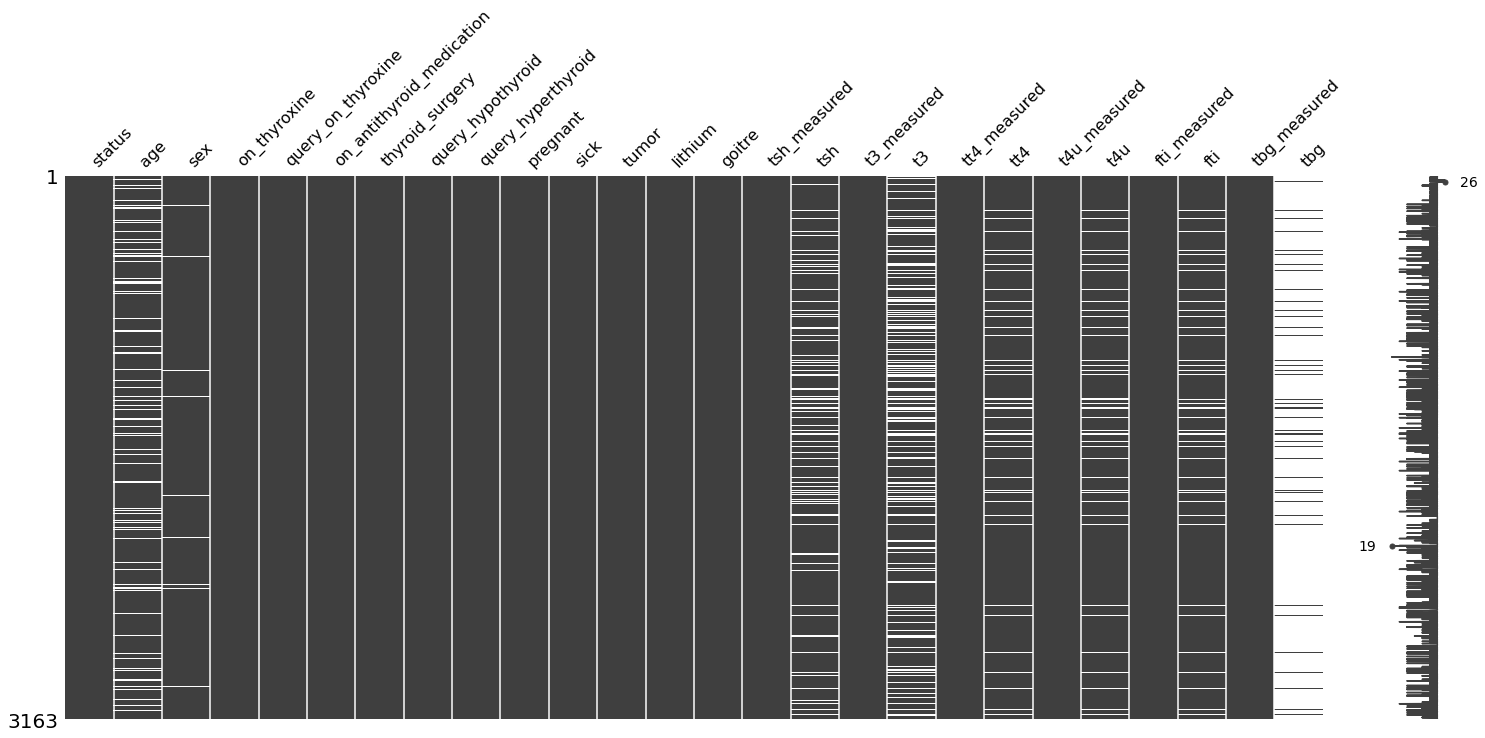

In [17]:
# visual representation of null values
import missingno as msno
msno.matrix(hyp)

The TBG, T3 and the age column have many missing values. 

The TBG and T3 column will have to be dropped entirely. 
The age column has a lot of missing values too

In [18]:
# droping the columns
hyp.drop(['t3', 'tbg'],axis = 1, inplace=True)

In [19]:
print (hyp.isna().sum())
hyp.dropna(inplace=True)


status                         0
age                          446
sex                           73
on_thyroxine                   0
query_on_thyroxine             0
on_antithyroid_medication      0
thyroid_surgery                0
query_hypothyroid              0
query_hyperthyroid             0
pregnant                       0
sick                           0
tumor                          0
lithium                        0
goitre                         0
tsh_measured                   0
tsh                          468
t3_measured                    0
tt4_measured                   0
tt4                          249
t4u_measured                   0
t4u                          248
fti_measured                   0
fti                          247
tbg_measured                   0
dtype: int64


The nulll data accounts for about 25% of the total dataset. However, it would be better to drop it for better predictions. 


In [20]:
hyp.isna().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
tsh_measured                 0
tsh                          0
t3_measured                  0
tt4_measured                 0
tt4                          0
t4u_measured                 0
t4u                          0
fti_measured                 0
fti                          0
tbg_measured                 0
dtype: int64

There is no missing data in the dataframe. 

In [21]:
# Dropping irrelevant columns
# The collumns indicating the measuerd or not measuered are obsolete and will not help with the predictions
hyp.columns
drop_cols = ['tsh_measured', 't3_measured', 'tt4_measured', 'tbg_measured', 't4u_measured', 'fti_measured' ]
hyp.drop(drop_cols, 1, inplace=True)

In [22]:
hyp.shape

(2278, 18)

In [23]:
# the last four columns should be converted to numerical columns
hyp.age = pd.to_numeric(hyp.age)
hyp.tsh = pd.to_numeric(hyp.tsh)
hyp.tt4 = pd.to_numeric(hyp.tt4)
hyp.t4u = pd.to_numeric(hyp.t4u)
hyp.fti = pd.to_numeric(hyp.fti)

hyp.dtypes

status                        object
age                            int64
sex                           object
on_thyroxine                  object
query_on_thyroxine            object
on_antithyroid_medication     object
thyroid_surgery               object
query_hypothyroid             object
query_hyperthyroid            object
pregnant                      object
sick                          object
tumor                         object
lithium                       object
goitre                        object
tsh                          float64
tt4                          float64
t4u                          float64
fti                          float64
dtype: object

##### OUTLIERS 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

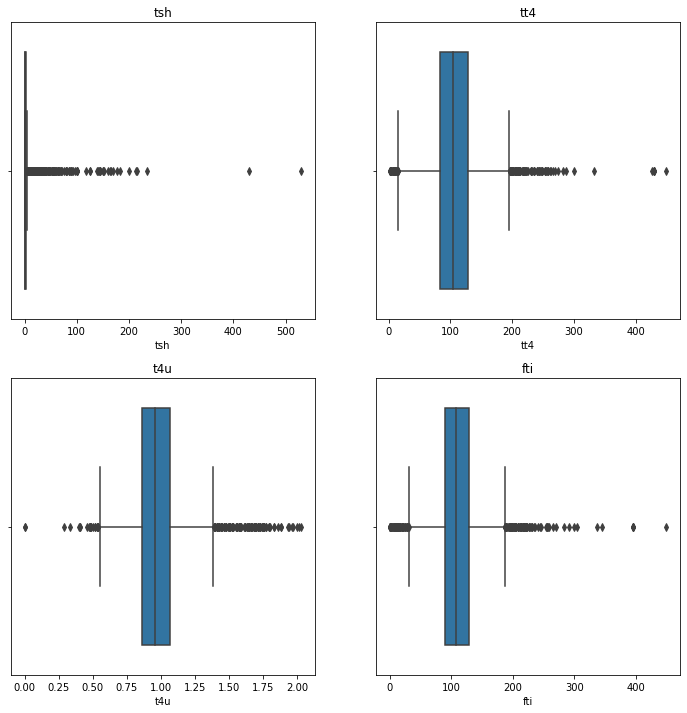

In [24]:
# Checking for Outliers
 
# we save the column names onto a dictionary
boxplot_ls = {'tsh': 1, 'tt4': 2, 't4u': 3, 'fti': 4}

plt.figure(figsize=(12,12))

# we make a boxplot for each numerical column
for a,i in boxplot_ls.items():
  plt.subplot(2,2,i)
  sns.boxplot(hyp[a])
  plt.title(a)

plt.show()

# Perform EDA

##### Univariate 

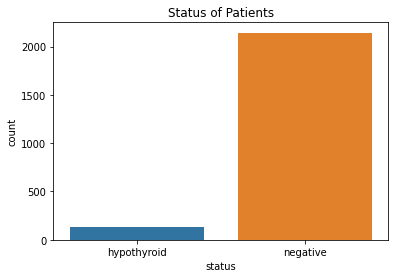

In [25]:

sns.countplot(x='status',data=hyp)
plt.title('Status of Patients')
plt.show()

# The count plot shows the number of people that were diagnosed with hypothyroidism and those that were found negative

In [26]:
from pandas_profiling import ProfileReport

profile = ProfileReport(hyp, title="House Data", html={'style':{'full_width':True}})
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/32 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

The 

In [27]:
profile.to_file(output_file="Hypothyroid.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

##### Bivariate 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'FTI vs TT4')

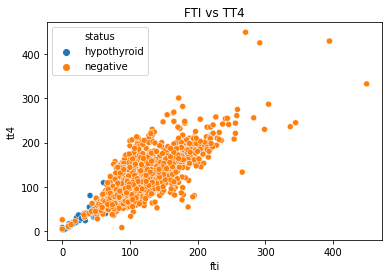

In [28]:
# Scatter plot of negative and positive hyp
sns.scatterplot(hyp['fti'], hyp['tt4'], hue='status', data= hyp ). set_title("FTI vs TT4")

This shows there is a strong correlation between the FTI and TT4 valies in the chart. Furthermore it can be infered that hypothyroidism is prevelant in :
- FTI < 90 and, 
- TT4 < 110  

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'T4U vs TSH')

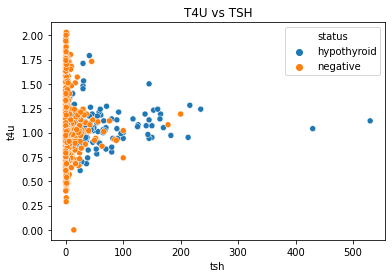

In [29]:
# Scatterplot of TSH and T4U
sns.scatterplot(hyp['tsh'], hyp['t4u'], hue='status', data= hyp ).set_title("T4U vs TSH") 

There is no apparent relationship between the two variables. 

The hypothyroud population possesses a higher value of TSH

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'FTI vs T4U')

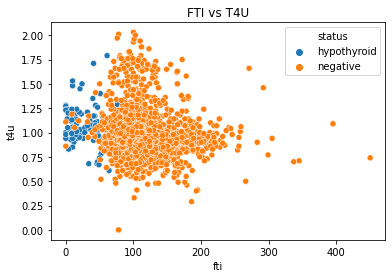

In [30]:
# Scatter plot of FTI and T4U hyp
sns.scatterplot(hyp['fti'], hyp['t4u'], hue='status', data= hyp ). set_title("FTI vs T4U")

There is no correlation between the FTI and T4U

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'FTI vs TSH')

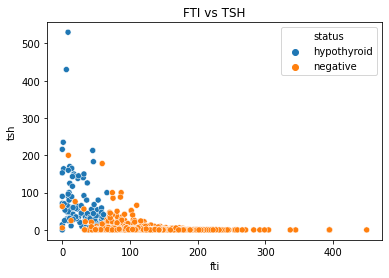

In [31]:
# Scatter plot of negative and positive hyp
sns.scatterplot(hyp['fti'], hyp['tsh'], hue='status', data= hyp ). set_title("FTI vs TSH")

There is no correlation

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'T4U vs TT4')

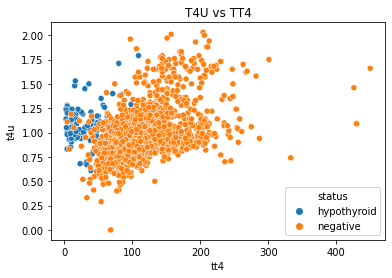

In [32]:
# Scatterplot of TT4H and T4U
sns.scatterplot(hyp['tt4'], hyp['t4u'], hue='status', data= hyp ).set_title("T4U vs TT4") 

No correlation. 

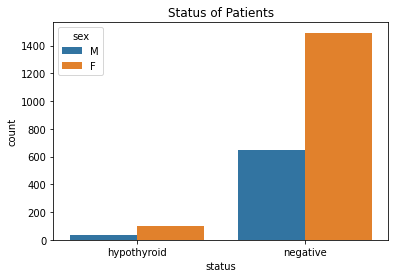

In [33]:

sns.countplot(x='status', hue= "sex",data=hyp)
plt.title('Status of Patients')
plt.show()


There were more females in the dataframe than they are males. Which accounts for the wide disparity between the number of infected and negative population of females 

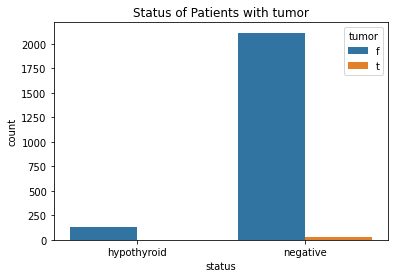

In [34]:
# Lets look at the relationship between the other factors and hypothyroid diagnosis
sns.countplot(x='status', hue= "tumor",data=hyp)
plt.title('Status of Patients with tumor')
plt.show()
# There is no relationship between the two columns

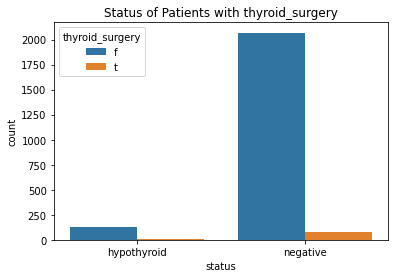

In [35]:
sns.countplot(x='status', hue= "thyroid_surgery",data=hyp)
plt.title('Status of Patients with thyroid_surgery')
plt.show()
# There is no relationship between the two columns


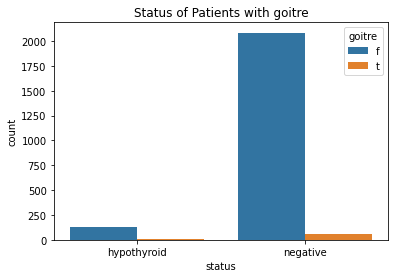

In [36]:
sns.countplot(x='status', hue= "goitre",data=hyp)
plt.title('Status of Patients with goitre')
plt.show()
# There is no relationship between the two columns


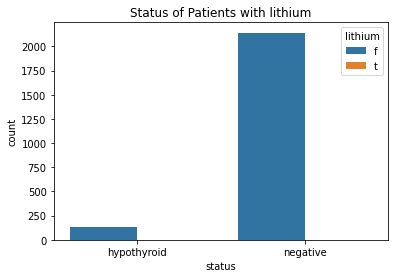

In [37]:
sns.countplot(x='status', hue= "lithium",data=hyp)
plt.title('Status of Patients with lithium')
plt.show()
# There is no relationship between the two columns


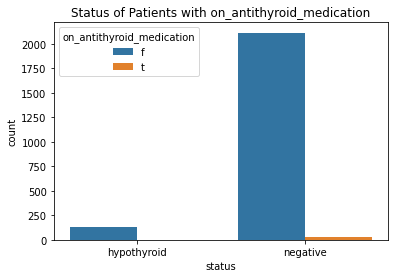

In [38]:
sns.countplot(x='status', hue= "on_antithyroid_medication",data=hyp)
plt.title('Status of Patients with on_antithyroid_medication')
plt.show()
# There is no relationship between the two columns


From the EDA we can infer that the first columns before the TSH values are not relevant because thereis no relationship between the columns with the status of Hypothyroid. 

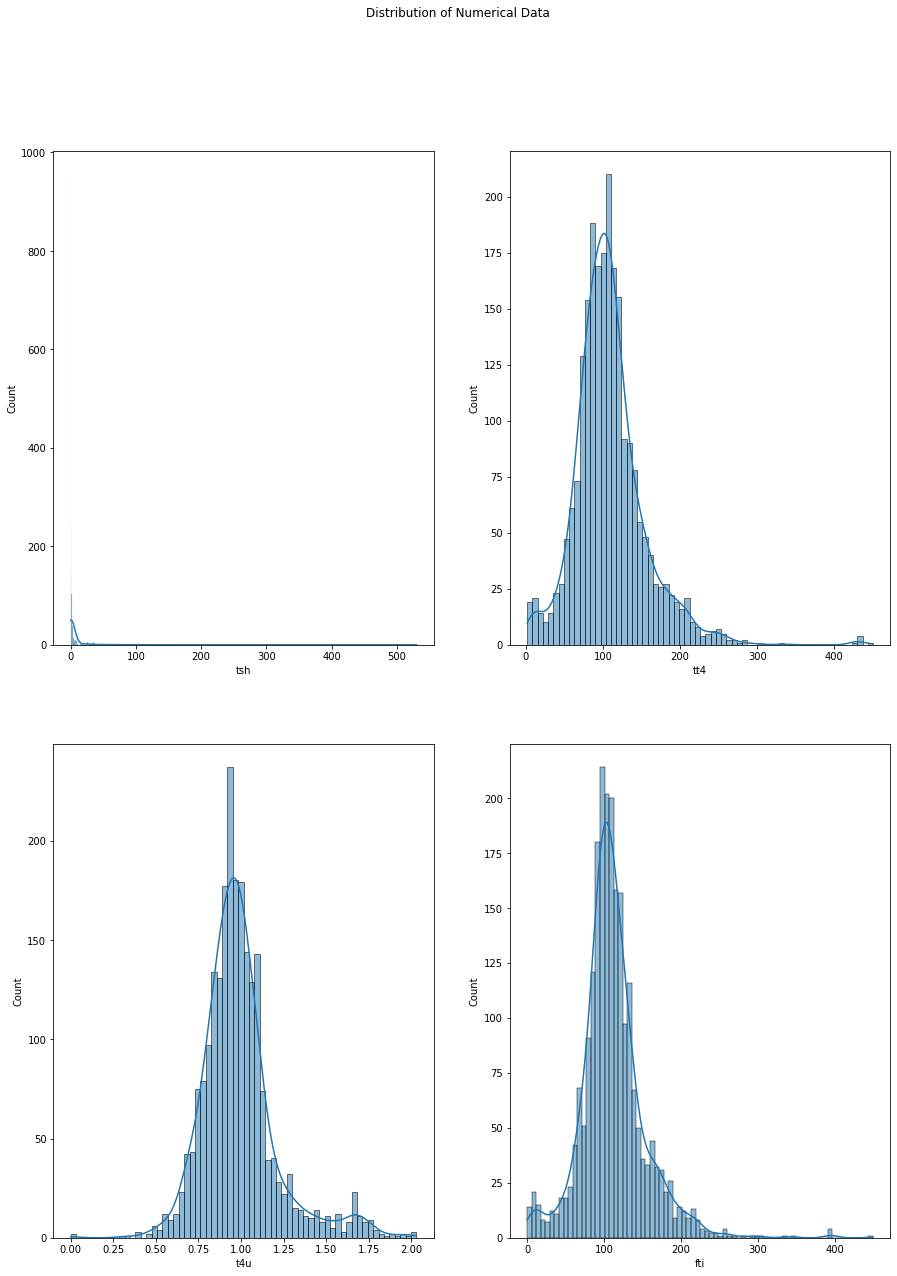

In [39]:
# Distribution of the numerical data.
# Using the seaborn distplot 

fig, axes = plt.subplots(2, 2,  figsize=(15, 20))

fig.suptitle('Distribution of Numerical Data')

sns.histplot( hyp["tsh"] , ax=axes[0, 0], kde= True)
sns.histplot( hyp['tt4'] , ax=axes[0, 1], kde= True)
sns.histplot( hyp["t4u"] , ax=axes[1, 0], kde= True)
sns.histplot( hyp['fti'] , ax=axes[1, 1], kde= True)

# FEATURE ENGINEERING 

The next step is to remove these columns.

In [40]:
# CREATE A COPY OF THE DF BEFORE DROPING THE COLUMNS
hypcopy = hyp

# DEFINE THE COLUMNS TO DROP 
df = hyp[['sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre' ]]

# DROP THE COLUMNS AND PREVIEW THE DATASET
hypcopy = hypcopy.drop(df.columns, 1)
hypcopy

status  age    tsh    tt4   t4u    fti
0     hypothyroid   72   30.0   15.0  1.48   10.0
1     hypothyroid   15  145.0   19.0  1.13   17.0
2     hypothyroid   24    0.0    4.0  1.00    0.0
3     hypothyroid   24  430.0    6.0  1.04    6.0
4     hypothyroid   77    7.3   57.0  1.28   44.0
...           ...  ...    ...    ...   ...    ...
3158     negative   58    5.8   86.0  0.91   95.0
3159     negative   29    0.8   99.0  1.01   98.0
3160     negative   77    1.2   71.0  0.68  104.0
3161     negative   74    1.3   65.0  0.48  137.0
3162     negative   56    0.0  139.0  0.97  143.0

[2278 rows x 6 columns]

There are now six columns that will help with the analysis and model building. 

In [41]:
# The next part is using a pearsons_r corelation heatmap. 
corr = hypcopy.corr()
corr

age       tsh       tt4       t4u       fti
age  1.000000 -0.008843 -0.111135 -0.234889  0.024560
tsh -0.008843  1.000000 -0.329317  0.062572 -0.376649
tt4 -0.111135 -0.329317  1.000000  0.393780  0.826887
t4u -0.234889  0.062572  0.393780  1.000000 -0.137918
fti  0.024560 -0.376649  0.826887 -0.137918  1.000000

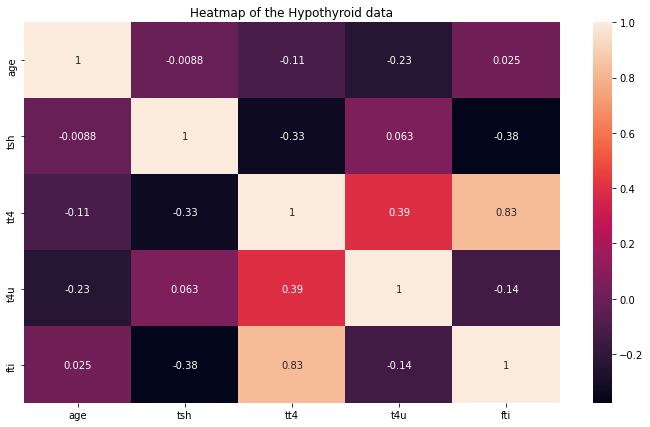

In [42]:
#To get a good visualization we can use a heat map to see the corelation between the data
plt.figure(figsize = (12, 7))
plt.title('Heatmap of the Hypothyroid data')
sns.heatmap(corr, annot=True)

In [43]:
hypcopy.describe(include = "all")

status          age  ...          t4u         fti
count       2278  2278.000000  ...  2278.000000  2278.00000
unique         2          NaN  ...          NaN         NaN
top     negative          NaN  ...          NaN         NaN
freq        2143          NaN  ...          NaN         NaN
mean         NaN    52.967515  ...     0.990584   111.54381
std          NaN    19.126829  ...     0.225798    42.42828
min          NaN     1.000000  ...     0.000000     0.00000
25%          NaN    37.000000  ...     0.860000    90.00000
50%          NaN    56.000000  ...     0.960000   107.00000
75%          NaN    69.000000  ...     1.070000   129.00000
max          NaN    98.000000  ...     2.030000   450.00000

[11 rows x 6 columns]

In [44]:
#LABEL ENCODING THE DATA IN THE STATUS COLUMN. 
from  sklearn.preprocessing import LabelEncoder

la = LabelEncoder()
hypcopy.status = la.fit_transform(hypcopy.status)
hypcopy

status  age    tsh    tt4   t4u    fti
0          0   72   30.0   15.0  1.48   10.0
1          0   15  145.0   19.0  1.13   17.0
2          0   24    0.0    4.0  1.00    0.0
3          0   24  430.0    6.0  1.04    6.0
4          0   77    7.3   57.0  1.28   44.0
...      ...  ...    ...    ...   ...    ...
3158       1   58    5.8   86.0  0.91   95.0
3159       1   29    0.8   99.0  1.01   98.0
3160       1   77    1.2   71.0  0.68  104.0
3161       1   74    1.3   65.0  0.48  137.0
3162       1   56    0.0  139.0  0.97  143.0

[2278 rows x 6 columns]

# Modelling 


### Part 1: Decision trees:
- For this section, you should build a model that makes the above prediction. You should not use individual decision trees, rather you should use at least 2 out of the 3 advanced models we have studied: Random forests, Ada boosted trees, and gradient boosted trees.
- Try and optimize each of the 2 models, making sure to document how you've set up your hyperparameters.


- Identify which of the 2 models you trust most, and use your model to determine which features are most impactful in influencing the prediction
- Note that with decision trees, you don't need to do a lot of data cleaning. This will be very different with SVM.

In [45]:
#SPLIT THE DATA INTO THE LABELS AND FEATURES. 
X = hypcopy.drop('status', 1)
y = hypcopy.status.values


In [46]:
# SPLIT THE DATA INTO TRAINING AND TESTING SETS
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state= 42)


In [47]:
# RANDOM FORESTS
# Import the model
from sklearn.ensemble import RandomForestRegressor


forest = RandomForestRegressor(n_estimators = 100, random_state=42, min_samples_split = 20, max_depth=5)
forest = forest.fit(X_train, y_train)

In [48]:
# MAKE A PREDICTION 
y_pred = forest.predict(X_test)


comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

comparison_frame.describe()

Actual   Predicted
count  684.000000  684.000000
mean     0.937135    0.935283
std      0.242899    0.226761
min      0.000000    0.005099
25%      1.000000    1.000000
50%      1.000000    1.000000
75%      1.000000    1.000000
max      1.000000    1.000000

From the Dataframe above we can see that the random forest performed well. Howwever, we need to assess the metrics using the RMSE, MAE and MSE. 

In [49]:
from sklearn import metrics

# ASSESSING THE RANDOM FOREST MODEL 
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.020085994172722492
Mean Squared Error: 0.010902529459457858
Root Mean Squared Error: 0.1044151783001775


The RMSE is 0.1044

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


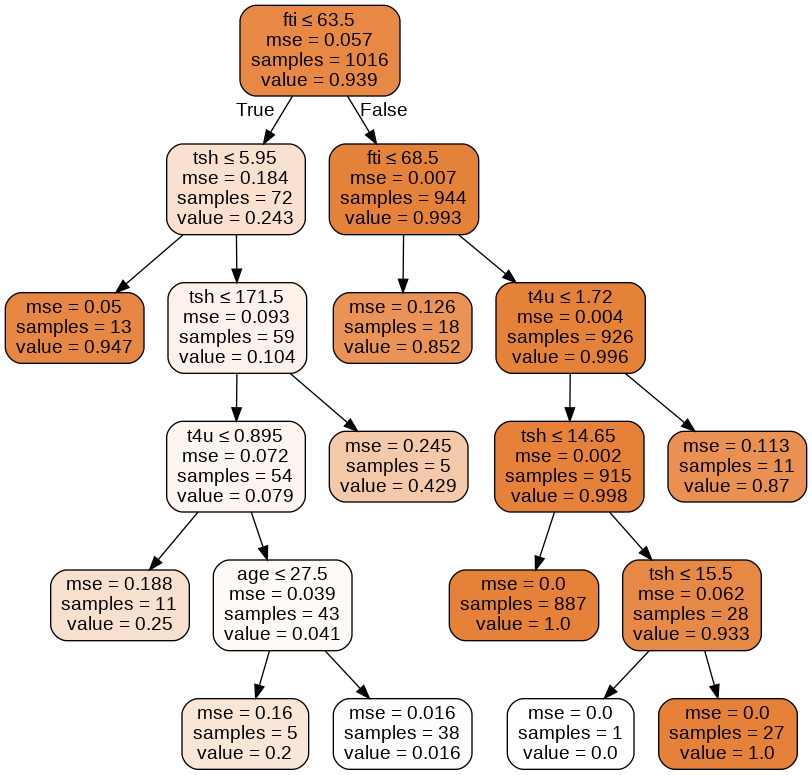

In [50]:
# VISUALIZE THE RANDOM FOREST MODEL. 
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
# pick a specific tree from the forest
tree = forest.estimators_[50]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('hypothyroid_forest.png')
Image(graph.create_png())

In [51]:
# IMPORTANCE
# Get numerical feature importances
importances = list(tree.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X.columns, importances)]

print(feature_importances) 
print()

#sort the values in descending order, to see the most important features first.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

[('age', 0.0), ('tsh', 0.2), ('tt4', 0.0), ('t4u', 0.01), ('fti', 0.79)]

Variable: fti                  Importance: 0.79
Variable: tsh                  Importance: 0.2
Variable: t4u                  Importance: 0.01
Variable: age                  Importance: 0.0
Variable: tt4                  Importance: 0.0


We can infer that the FTI, TSH and T4U tests are the most important in diagnosing Hypothyroidism. 

###### AdaBoost 

In [52]:
# LETS TRY TO SEE WHETHER THE ACCURACY OF THE MODEL CAN BE IMPOROVED THROUGH ADA BOOSTING
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

# Note that adaboost needs a simple decision tree in its constructor. Again, tweak the max_depth and see how it influences the process
ada_boost = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),
                          n_estimators=300, random_state=0)

ada_boost = ada_boost.fit(X_train, y_train)
y_pred_ada = ada_boost.predict(X_test)

In [53]:
# ASSESSING THE ADABOOST MODEL 
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_ada))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_ada))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_ada)))

Mean Absolute Error: 0.03762121662445827
Mean Squared Error: 0.014562761707772171
Root Mean Squared Error: 0.12067626820453213


The RMSE is 0.1207. This is a little bit higher than that of the Random forest model. 

In [54]:
# LETS TRY GRADIENT BOOSTING 

from sklearn.ensemble import GradientBoostingRegressor
target_number_of_trees = 300

gbr = GradientBoostingRegressor(n_estimators=target_number_of_trees, learning_rate=0.02, max_depth=2)
gbr = gbr.fit(X_train, y_train)

y_pred_gbr = gbr.predict(X_test)

In [55]:
# ASSESSING THE ADABOOST MODEL 
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_gbr))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_gbr))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_gbr)))

Mean Absolute Error: 0.01996159639934864
Mean Squared Error: 0.009935811347168847
Root Mean Squared Error: 0.09967854005335776


With a learning rate of 0.02, the RMSE value is 0.0998. 

Therefore, the Gradient Boosting method gives the most accurate predictions. However, the model might be considered overfit. 

### Part 2: SVM:

- In this section, we will clean the data a little bit so as to make sense of the features.

- Document what transformation you've done on the data.

- Apply Polynomial, linear and rbf kernel function to build your SVM model and then evaluate their performance and pick the kernel that performs the best. Remember to tune your parameters to improve the performance of your model. 

In [56]:
# Check the shape of X. 
X.shape

(2278, 5)

In [57]:
# Check the shape of y. 
y.shape

(2278,)

In [58]:
# The way the dataset is right now, it would be difficult to plot the graph on a 2-Dimencional plane because the dataset has 4 features. 
# The importance of the differnt features was already determined when performing the Random Forest classifier
print (feature_importances)
X = X[['fti', 'tsh']].values
X.shape


[('fti', 0.79), ('tsh', 0.2), ('t4u', 0.01), ('age', 0.0), ('tt4', 0.0)]


(2278, 2)

In [59]:
y

array([0, 0, 0, ..., 1, 1, 1])

In [60]:
# SPLIT THE DATA INTO TRAINING AND TESTING SETS. 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state= 42)

##### Polynomial Function

In [61]:
from sklearn.svm import SVC

# Building the model 
polyclassifier = SVC(kernel='poly',degree=3,gamma='scale')
# Training the model using the training set
polyclassifier.fit(X_train, y_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [62]:
y_pred_pc = polyclassifier.predict(X_test)

In [63]:
# Model Evaluation
print( accuracy_score(y_test, y_pred_pc))


0.9824561403508771


The polynomial kernel accuracy score is 98.24%

##### Radial basis function (rbf)

In [64]:
# Building the model 
rbfclassifier = SVC(kernel='rbf')
# Training the model using the training set
rbfclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [65]:
# making a prediction
y_pred_rbf = rbfclassifier.predict(X_test)

In [66]:
# Model Evaluation
print( accuracy_score(y_test, y_pred_rbf))

0.9839181286549707


The accuracy score of the RBF kernel is 98.39%

##### Sigmoid function

In [67]:
# Building the model 
sigclassifier = SVC(kernel='sigmoid')
# Training the model using the training set
sigclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [70]:
# making a prediction
y_pred_sg = sigclassifier.predict(X_test)

In [71]:
# Model Evaluation
print( accuracy_score(y_test, y_pred_sg))

0.9385964912280702


The sigmoid kernel also has an accuracy rate of 98.39%

#### **Comparison of the Kernel Performance**

When we compare the performance of the three kernel, it clear that sigmoid performs the worst. This is because the sigmoid function returns two values, 0 and 1 hence its more suited to binary classification problems.


On the other hand, we can see that the rbf kernel also know as **Gaussian Kernel** l  achieved a 98.39% prediction rate. Thus, this Kernel is the best suited to perform this type of binary calssification. 

# Evaluation

# Follow up questions

## a) Did we have the right data?


> Yes, the data was correct. Diagnosis of thryroid is dependent on more than one test and therefore the ability to have all the test performed and presented was a huge benefit to the accuracy of the model. However, the T3 tests was not done on a large population of the people and had to be dropped. The models accuracy would have been improved with the data from the test. 

## b) Do we need other data to answer our question?

> The T3 test data and the TBG tests data would have greatly improved our models prediction. 


## c) Did we have the right question?

> Yes, the prediction model for dignosis of hypothyroid is the best question to answewr with this data. 